## 3章

\begin{eqnarray}
y
 =
  \begin{cases}
    0 & ( b + w_1x_1 + w_2x_2 \leqq \theta ) \\
    1 & ( b + w_1x_1 + w_2x_2 \gt \theta )
  \end{cases}
\end{eqnarray}

上記式は以下に変換

\begin{equation}
y = h( b + w_1x_1 + w_2x_2)
\end{equation}

\begin{eqnarray}
h(x)
 =
  \begin{cases}
    0 & ( x \leqq \theta ) \\
    1 & ( x \gt \theta )
  \end{cases}
\end{eqnarray}

h は活性化関数と呼ばれる
この関数は閾値を境に出力が切り替わるためステップ関数や階段関数と呼ばれる

\begin{eqnarray}
h(x)
 =
  \begin{cases}
    0 & ( x \leqq \theta ) \\
    1 & ( x \gt \theta )
  \end{cases}
\end{eqnarray}

### シグモイド関数
\begin{eqnarray}
h(x)
 =
    \frac {1}{1 + exp(-x)}
  \end{eqnarray}

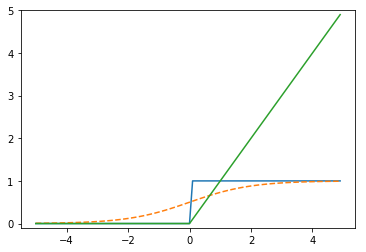

In [2]:
import numpy as np
import matplotlib.pylab as plt
def step(x):
    y = x > 0
    return np.array(x > 0, dtype=np.int)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5,5,0.1)

y1= step(x)
y2 = sigmoid(x)
y3 = relu(x)
plt.ylim(-0.1,5)
plt.plot(x, y1, label="step")
plt.plot(x, y2, linestyle="--", label="sigmoid")
plt.plot(x, y3, linestyle="-", label="relu")

plt.show()


### 行列の積

ようわからん。あとでまた学習


### MINST データセット

In [5]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

# (訓練画像、訓練ラベル)、（テスト画像、テストラベル）
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False, one_hot_label=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 形状を元の画像サイズに変形
print(img.shape)  # (28, 28)

img_show(img)

(60000, 784)
(60000,)
(10000, 784)
(10000,)
5
(784,)
(28, 28)


In [6]:
# 推論処理
# MINST データとサンプルの学習済みの重みパラメータを使用してニューラルネットワークによる推論処理を行う
# 結果として、学習済みのニューラネットワークの認識精度を表示
from ch03.neuralnet_mnist import get_data, init_network,predict
import numpy as np
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

print(len(x))

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p==t[i:i+batch_size])

line = "Accuracy:{0}".format(str(float(accuracy_cnt/ len(x))))
print(line)



10000
Accuracy:0.9352
